# Master's in Mechanical Engineering: the economics

Although there are many reasons to get a Master's degree in ME, a popular one is the economics. The following analysis shows fairly convincingly that as of 2019 it makes huge economic sense to seek a Master's.

In the following, there are some assumptions. Feel free to change them and see what changes!

In [2]:
import matplotlib.pyplot as plt # for plots!
import numpy as np

First, we define some parameters.

In [3]:
# NACE 2019 https://www.utdallas.edu/career/docs/about/NACESalary2019.pdf
salary_starting_me = 70329 # NACE 2019
salary_starting_mme = 82107 # NACE 2019
raise_per = .02 # total guess of average raise percentage
career_years_me = 35 # years in ME career
career_years_mme = career_years_me - 1 # years in MME career
mme_tuition = 36e3 # tuition for MME

Now, some functions for computing salary based on constant raise assumptions.

In [4]:
def salary_annual(starting_salary,raise_per,current_year):
    return starting_salary*(1+raise_per)**current_year

def salary_total(starting_salary,raise_per,total_years):
    total = 0
    year = 0
    for i in range(0,total_years):
        total += salary_annual(starting_salary,raise_per,year)
    return total

Compute salaries, annual and cumulative, across the career of an ME.

In [5]:
salary_me = 0.
salary_me_a = np.array([])
salary_cumulative_me = 0.
salary_cumulative_me_a = np.array([])
for i in range(0,career_years_me):
    salary_me = salary_annual(salary_starting_me,raise_per,i)
    salary_me_a = np.append(salary_me_a,[salary_me])
    salary_cumulative_me += salary_annual(salary_starting_me,raise_per,i)
    salary_cumulative_me_a = np.append(salary_cumulative_me_a,[salary_cumulative_me])

Compute salaries, annual and cumulative, across the career with a Master's (assuming a year is taken to do the Master's ... tuition is included in the calculus).

In [6]:
salary_mme = 0.
salary_mme_a = np.array([-mme_tuition])
salary_cumulative_mme = 0.
salary_cumulative_mme_a = np.array([-mme_tuition])
for i in range(0,career_years_mme):
    salary_mme = salary_annual(salary_starting_mme,raise_per,i)
    salary_mme_a = np.append(salary_mme_a,[salary_mme])
    salary_cumulative_mme += salary_annual(salary_starting_mme,raise_per,i)
    salary_cumulative_mme_a = np.append(salary_cumulative_mme_a,[salary_cumulative_mme])

So the total value-added over a career is as follows.

In [7]:
print(salary_cumulative_mme-salary_cumulative_me)

427849.73060168885


Plot the annual salary.

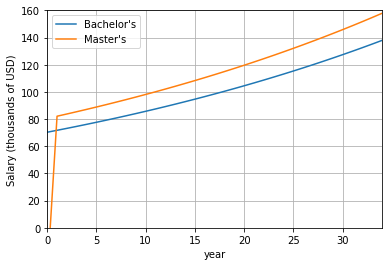

In [12]:
plt.plot(salary_me_a/1e3,label='Bachelor\'s')
plt.plot(salary_mme_a/1e3,label='Master\'s')
plt.xlim([0,34])
plt.ylim([0,160])
plt.xlabel('year')
plt.ylabel('Salary (thousands of USD)')
plt.legend()
plt.grid()
plt.show()

Plot the cumulative salary.

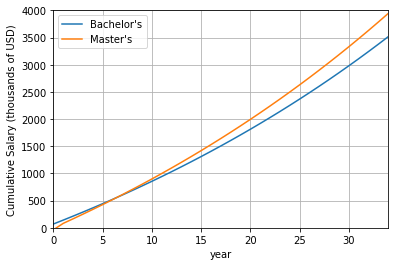

In [10]:
plt.plot(salary_cumulative_me_a/1e3,label='Bachelor\'s')
plt.plot(salary_cumulative_mme_a/1e3,label='Master\'s')
plt.xlim([0,34])
plt.ylim([0,4000])
plt.xlabel('year')
plt.ylabel('Cumulative Salary (thousands of USD)')
plt.legend()
plt.grid()
plt.show()

Show the data in a table.

In [22]:
print('  ME | MSME ')
for c1,c2 in zip(salary_cumulative_me_a/1e3,salary_cumulative_mme_a/1e3):  
    print("%4.0f | %4.0f " % (c1, c2))

  ME | MSME 
  70 |  -36 
 142 |   82 
 215 |  166 
 290 |  251 
 366 |  338 
 444 |  427 
 523 |  518 
 604 |  610 
 686 |  705 
 770 |  801 
 856 |  899 
 943 |  999 
1032 | 1101 
1123 | 1205 
1216 | 1312 
1311 | 1420 
1407 | 1530 
1506 | 1643 
1606 | 1758 
1709 | 1875 
1813 | 1995 
1920 | 2117 
2029 | 2241 
2140 | 2368 
2253 | 2498 
2368 | 2630 
2486 | 2765 
2606 | 2902 
2728 | 3042 
2853 | 3185 
2981 | 3331 
3110 | 3480 
3243 | 3631 
3378 | 3786 
3516 | 3944 


So the crossover in terms of cumulative compensation is around the seventh year.

A final note. It might be argued that we should be accounting for inflation, which is probably true, but can be approximately accounted-for by reducing `raise_per`. Consider the above `raise_per` to be an "after inflation" estimate. Other considerations include retirement investment yields and taxes and probably some stuff I'm missing.